These are study notes from the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), by Andreas C. Müller and Sarah Guido. As machine learning and Python are currently new to me, I found useful to write down the code examples and some discussions presented on the book. The material below, except some notes done by myself, is taken from the chapter three, "Unsupervised Learning". And `RobustScaler`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import IPython
import IPython.display
import pandas as pd
import wand.image

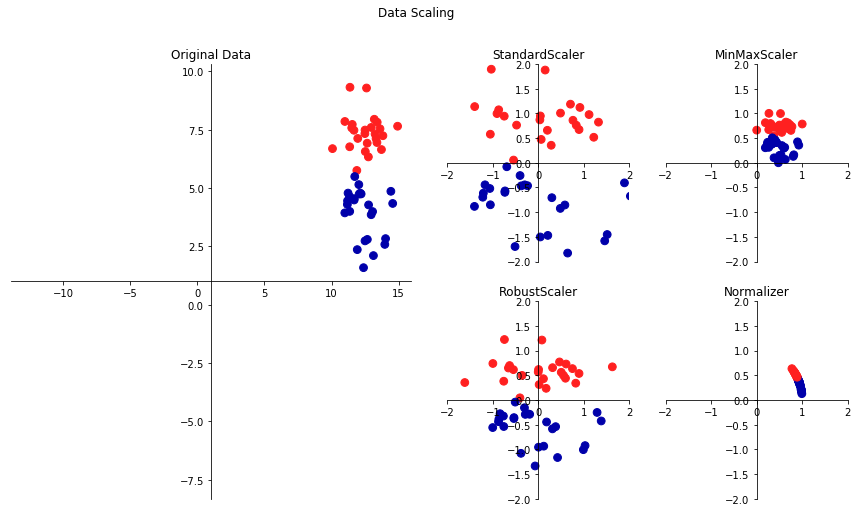

In [5]:
# PRE-PROCESSING AND SCALING

mglearn.plots.plot_scaling()
plt.suptitle("Data Scaling")
plt.show()

# DIFERRENT KINDS OF PRE-PROCESSING

# - `StandardScaler`:
# - `RobustScaler`:
# - `MixMaxScaler`:
# - `Normalizer`:

In [15]:
# APPLYING DATA TRANSFORMATIONS

# As an example, say we want to apply the supervised algorithm kernel SVM to the `cancer` data 
# set, and use then `MinMaxScaler` for pre-processing the data.

# First, we split the data set.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# Remember that the `train_test_split` function "randomly" splits the data set: 75% of the 
# samples to the training set and 25% to the test set.
print(cancer.data.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(426, 30)
(143, 30)


In [23]:
# Import the class implementing the pre-processing. Then instantiate it and fit the scaler 
# using the `fit` method.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# It is crucial to note `scaler` is fitted based on a particular data set, which is `X_train` 
# is this case. That means it is defined as a mathematical transformation that rescales
# `X_train` based on `MinMaxScaler` properties.

# In other words, as `scaler` is constructed based on `X_train`, it is not necessarily going 
# to work in the same way on different data sets, such as `X_test`. We going to check that below.

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
# To actually scale the data, we run the `transform` method, which is used in scikit-learn 
# whenever a model returns a new data representation.
X_train_scaled = scaler.transform(X_train)

# For illustration purposes, we can compare the scaled first sample to the original
# sample. First, to condensate the way Python shows the results, we set some of the print options.

np.set_printoptions(suppress=True, precision=4)

X_train_scaled[1]

array([ 0.3776,  0.3176,  0.3679,  0.2307,  0.3366,  0.295 ,  0.1392,
        0.2395,  0.4136,  0.1819,  0.0625,  0.1299,  0.0666,  0.0337,
        0.123 ,  0.1419,  0.0388,  0.2249,  0.1094,  0.0663,  0.296 ,
        0.3777,  0.2923,  0.1535,  0.3971,  0.3028,  0.1542,  0.5117,
        0.3317,  0.316 ])

In [46]:
X_train[1]

array([  14.96  ,   19.1   ,   97.03  ,  687.3   ,    0.0899,    0.0982,
          0.0594,    0.0482,    0.1879,    0.0585,    0.2877,    0.948 ,
          2.171 ,   24.87  ,    0.0053,    0.0211,    0.0154,    0.0119,
          0.0152,    0.0028,   16.25  ,   26.19  ,  109.1   ,  809.8   ,
          0.1313,    0.303 ,    0.1804,    0.1489,    0.2962,    0.0847])

In [47]:
# We can also take a look at the minimum and maximum values per feature in the original data. 

X_train.min(axis=0)

array([   6.981 ,    9.71  ,   43.79  ,  143.5   ,    0.0526,    0.0194,
          0.    ,    0.    ,    0.106 ,    0.0502,    0.1153,    0.3602,
          0.757 ,    6.802 ,    0.0017,    0.0023,    0.    ,    0.    ,
          0.0095,    0.0009,    7.93  ,   12.02  ,   50.41  ,  185.2   ,
          0.0712,    0.0273,    0.    ,    0.    ,    0.1566,    0.0552])

In [48]:
X_train.max(axis=0)

array([   28.11  ,    39.28  ,   188.5   ,  2501.    ,     0.1634,
           0.2867,     0.4268,     0.2012,     0.304 ,     0.0958,
           2.873 ,     4.885 ,    21.98  ,   542.2   ,     0.0311,
           0.1354,     0.396 ,     0.0528,     0.0615,     0.0298,
          36.04  ,    49.54  ,   251.2   ,  4254.    ,     0.2226,
           0.9379,     1.17  ,     0.291 ,     0.5774,     0.1486])

In [49]:
# And after the scaling process. The minimum is 0 and the maximum is 1, as expected after the
# `MinMaxScaler` pre-processing.

X_train_scaled.min(axis=0)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [50]:
X_train_scaled.max(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [51]:
# To apply the SVM algorithm to the scaled data, the test set must be transformed as well.

X_test_scaled = scaler.transform(X_test)

In [52]:
# As we have warned before, the transformation provided by `scaler` will not necessarily 
# work in the same way on the test set, since it was constructed based on the training set.

X_test_scaled.min(axis=0)

array([ 0.0336,  0.0227,  0.0314,  0.0114,  0.1413,  0.0441,  0.    ,
        0.    ,  0.154 , -0.0062, -0.0014,  0.0059,  0.0043,  0.0008,
        0.0392,  0.0112,  0.    ,  0.    , -0.0319,  0.0066,  0.0266,
        0.0581,  0.0203,  0.0094,  0.1094,  0.0264,  0.    ,  0.    ,
       -0.0002, -0.0018])

In [53]:
X_test_scaled.max(axis=0)

array([ 0.9579,  0.815 ,  0.9558,  0.8935,  0.8113,  1.2196,  0.8796,
        0.9334,  0.9323,  1.0371,  0.4267,  0.4977,  0.4412,  0.2837,
        0.487 ,  0.7386,  0.7672,  0.6293,  1.3369,  0.3906,  0.8961,
        0.7932,  0.8486,  0.7449,  0.9155,  1.1319,  1.0701,  0.9237,
        1.2053,  1.6307])

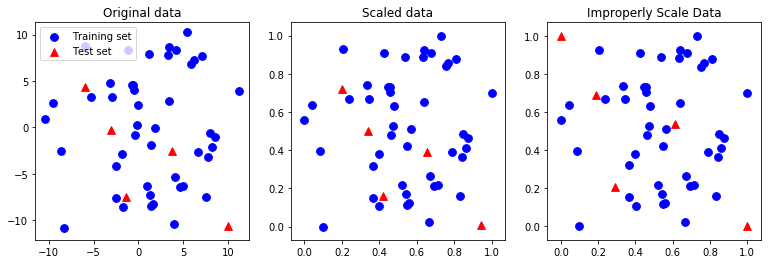

In [59]:
# SCALING TRAINING AND TEST DATA THE SAME WAY

# It is important the exactly same transformation is is applied to the both training 
# and test sets for the supervised model makes sense when applied to the test set.

# To illustrate, lets use the `make_blobs` data set, where each sample has two features.

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=50, random_state=4, cluster_std=2)
# For this illustration assignment, the target is not important.
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

X_train[:6]

The following figure illustrates what would have happend if a particular transformation was create to also scale the test set in the range [0,1].

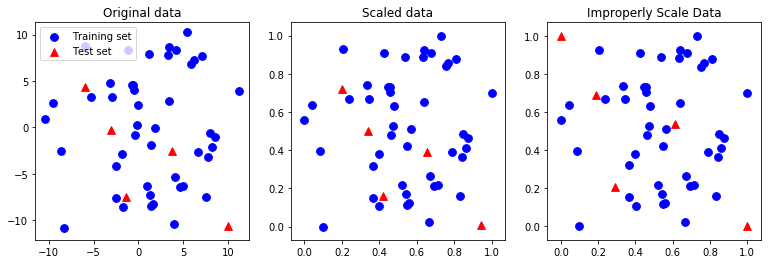

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Plotting training and test set without scaling.
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label='Test set', s=60, marker='^')
axes[0].legend(loc='upper left')
axes[0].set_title("Original data")

# Applying and plotting the proper scaling procedure. Same transformation both on 
# training and test set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', label='Test set', s=60, marker='^')
axes[1].set_title("Scaled data")

# Applying and plotting the improper scaling procedure. Different transformations on training
# and test set. This is not the correct procedure, it is done here just for illustration purposes.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_improperly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label='Training set', s=60)
axes[2].scatter(X_test_scaled_improperly[:, 0], X_test_scaled_improperly[:, 1],
                c='r', label='Test set', s=60, marker='^')
axes[2].set_title("Improperly Scale Data")

# Showing the plot.
plt.show()